# Exploratory Data Analysis

This notebook is to explore the data and determine the distributions of the individual variables, missing data and outliers that need to be imputed or removed, collinearity, and get a handle on what impact the factors have in order to build an efficient model.

In [25]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings("ignore")

import importlib
mpl_toolkits = importlib.import_module('mpl_toolkits')

import os

In [2]:
from mpl_toolkits.basemap import Basemap

## Importing the Data

We import the data into a pandas dataframe and take a quick glance at what variables it contains, the size of the data, and the values within each variable

The data can be retrieved from here: https://www.kaggle.com/c/zillow-prize-1/data

To build the model, we will only use the 2016 data

In [26]:
# Changing the directory of the path to where the data has been stored
os.chdir('C:/Users/Ephraim/Desktop/Stevens/Coursework/Fall 2017/BIA 686/zillow/bia_686/data')

df = pd.read_csv('properties_2016.csv')

In [27]:
df.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


## Data columns

Let's see what each one of thse columns mean from the data dictionary that was supplied

In [5]:
datadict = pd.read_csv('data_dictionary.csv', encoding = "ISO-8859-1")
pd.set_option('display.max_colwidth', -1)

In [6]:
datadict

,Feature,Description,data type
0,'airconditioningtypeid',Type of cooling system present in the home (if any),factor
1,'architecturalstyletypeid',"Architectural style of the home (i.e. ranch, colonial, split-level, etc )",factor
2,'assessmentyear',The year of the property tax assessment,datetime
3,'basementsqft',Finished living area below or partially below ground level,numeric
4,'bathroomcnt',Number of bathrooms in home including fractional bathrooms,numeric
5,'bedroomcnt',Number of bedrooms in home,numeric
6,'buildingclasstypeid',"The building framing type (steel frame, wood frame, concrete/brick)",factor
7,'buildingqualitytypeid',Overall assessment of condition of the building from best (lowest) to worst (highest),factor
8,'calculatedbathnbr',Number of bathrooms in home including fractional bathroom,numeric
9,'calculatedfinishedsquarefeet',Calculated total finished living area of the home,numeric


## Number of Rows

Inspecting the size of the data is a fundamental process, and can be useful to find bugs later if some data was released unintensionally

In [7]:
'{:,}'.format(len(df))

'2,985,217'

## Visualizing the Target Value

The final piece of the data is the log error between their Zestimate and the actual sale price.  The error is converted into a log value since the objective distance between the predicted price and actual sale price varies widely with value of the property

In [8]:
target = pd.read_csv('train_2016_v2.csv')

In [9]:
target.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


## Formatting Date

The target date needs to be formated as a date.  

We also want to visualize how many sales was made during each month, since different times of the year can have an impact on the forecast

From the visualization we also find that from Nov-Dec, there seems to be a significant drop, which is logical since some of the data during those months was withheld to test the model with.

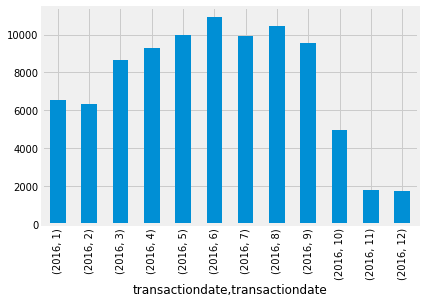

In [10]:
target['transactiondate'] = pd.to_datetime(target['transactiondate'], format='%Y-%m-%d')
target['transactiondate'] = target['transactiondate'].apply(lambda x : str(x.year) + "-" + str(x.month))
target['transactiondate'] = pd.to_datetime(target['transactiondate'], format='%Y-%m')
tr_date = target['transactiondate']
tr_date.groupby([tr_date.dt.year, tr_date.dt.month]).count().plot(kind="bar")

## Log by Date

We also want to see the correlation between the log error over time.  The current model could perform better at different times of the year.

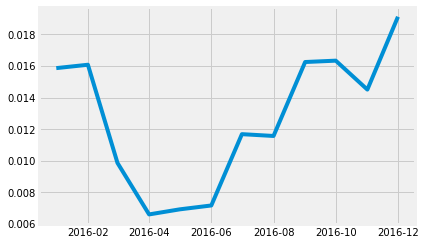

In [11]:
log_time = target.iloc[:, 1:3]
log_time = log_time.groupby(log_time['transactiondate']).mean().reset_index()
plt.plot(log_time['transactiondate'], log_time['logerror'])

## Log Error Distribution

Next we explore the distribution of log errors, which gives us a picture of how well the Zestimate performs.  

We decided to visualize the absolute error, since it matters less if the error was above or below the sale price than how close it was.  We find that most of the error occurs under 0.1%.  The more extreme errors could be because of faulty data or are outliers.

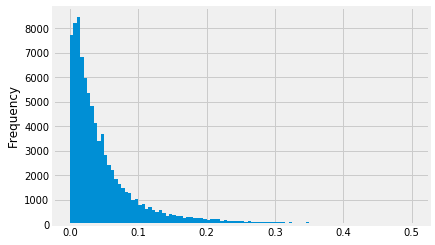

In [12]:
log_err = target['logerror'].abs()
log_err.plot(kind="hist", bins=100, range=[0.0, .5])

## Join with target variable

To complete the dataset, we join the label data.  Kaggle has stored it in a different csv, so we have to concatenate the two datasets

In [13]:
joined_data = pd.merge(target,df,on="parcelid",how="left")

In [16]:
joined_data.transactiondate = pd.to_datetime(joined_data.transactiondate,format='%Y-%m-%d')

# Dataset Characteristics
Our initial step is to get a feel for the data and its components.  This means exploring the data quality, the types of data contained, and a basic idea of their distributions.

In [14]:
# Data characteristics
joined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90275 entries, 0 to 90274
Data columns (total 60 columns):
parcelid                        90275 non-null int64
logerror                        90275 non-null float64
transactiondate                 90275 non-null datetime64[ns]
airconditioningtypeid           28781 non-null float64
architecturalstyletypeid        261 non-null float64
basementsqft                    43 non-null float64
bathroomcnt                     90275 non-null float64
bedroomcnt                      90275 non-null float64
buildingclasstypeid             16 non-null float64
buildingqualitytypeid           57364 non-null float64
calculatedbathnbr               89093 non-null float64
decktypeid                      658 non-null float64
finishedfloor1squarefeet        6856 non-null float64
calculatedfinishedsquarefeet    89614 non-null float64
finishedsquarefeet12            85596 non-null float64
finishedsquarefeet13            33 non-null float64
finishedsquarefeet15

In [15]:
joined_data.describe()

,parcelid,logerror,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
count,9.027500e+04,90275.000000,28781.000000,261.000000,43.000000,90275.000000,90275.000000,16.0,57364.000000,89093.000000,...,95.000000,89519.000000,20570.000000,8.989500e+04,9.027400e+04,90275.0,9.027400e+04,90269.000000,1783.000000,8.967000e+04
mean,1.298466e+07,0.011457,1.816372,7.229885,713.581395,2.279474,3.031869,4.0,5.565407,2.309216,...,311.694737,1968.532870,1.440739,1.800934e+05,4.576726e+05,2015.0,2.783353e+05,5983.975927,13.402692,6.049151e+13
std,2.504510e+06,0.161079,2.974168,2.716196,437.434198,1.004271,1.156436,0.0,1.900602,0.976172,...,346.354850,23.763475,0.544498,2.091299e+05,5.548844e+05,0.0,4.004955e+05,6838.876956,2.715966,2.046605e+11
min,1.071174e+07,-4.605000,1.000000,2.000000,100.000000,0.000000,0.000000,4.0,1.000000,1.000000,...,18.000000,1885.000000,1.000000,1.000000e+02,2.200000e+01,2015.0,2.200000e+01,49.080000,6.000000,6.037101e+13
25%,1.155950e+07,-0.025300,1.000000,7.000000,407.500000,2.000000,2.000000,4.0,4.000000,2.000000,...,100.000000,1953.000000,1.000000,8.124500e+04,1.990232e+05,2015.0,8.222800e+04,2872.830000,13.000000,6.037320e+13
50%,1.254734e+07,0.006000,1.000000,7.000000,616.000000,2.000000,3.000000,4.0,7.000000,2.000000,...,159.000000,1970.000000,1.000000,1.320000e+05,3.428720e+05,2015.0,1.929700e+05,4542.750000,14.000000,6.037615e+13
75%,1.422755e+07,0.039200,1.000000,7.000000,872.000000,3.000000,4.000000,4.0,7.000000,3.000000,...,361.000000,1987.000000,2.000000,2.105345e+05,5.405890e+05,2015.0,3.454195e+05,6901.090000,15.000000,6.059042e+13
max,1.629608e+08,4.737000,13.000000,21.000000,1555.000000,20.000000,16.000000,4.0,12.000000,20.000000,...,1366.000000,2015.000000,4.000000,9.948100e+06,2.775000e+07,2015.0,2.450000e+07,321936.090000,99.000000,6.111009e+13


## Data Quality Insights

There seem to be a lot of fields with missing values.  Before we analyze this further, let's segment the data based on type of feature that we saw in the data dictionary.

# Numerical Data

First, let's take a look at numerical data.

In [16]:
num_cols = ['logerror', 'roomcnt', 'bathroomcnt', 'fullbathcnt', 'bedroomcnt', 'calculatedbathnbr', 'threequarterbathnbr', 'fireplacecnt', 'garagecarcnt','numberofstories', 'poolcnt', 'unitcnt', 'finishedfloor1squarefeet', 'basementsqft', 'finishedsquarefeet12', 'calculatedfinishedsquarefeet', 'finishedsquarefeet13', 'finishedsquarefeet6', 'lotsizesquarefeet', 'yardbuildingsqft17', 'yardbuildingsqft26', 'poolsizesum', 'finishedsquarefeet15', 'finishedsquarefeet50', 'garagetotalsqft', 'landtaxvaluedollarcnt', 'structuretaxvaluedollarcnt', 'taxamount', 'taxvaluedollarcnt']
num_data = joined_data[num_cols]
num_data.columns = ['logerror', 'room_cnt', 'bath_cnt', 'fullbath_cnt', 'bed_cnt', 'bathnbr_cnt','3/4bathnbr_cnt', 'fireplace_cnt', 'garagecar_cnt', 'stories_cnt', 'pool_cnt', 'unit_cnt', 'floor1_sqft', 'basement_sqft', 'totallvng1_sqft', 'totallvng2_sqft', 'perimlvng_sqft', 'basearea_sqft', 'lot_sqft', 'patio_sqft', 'yardbldg_sqft', 'pool_sqft', 'total_sqft', 'finishedsqft50', 'garagetotal_sqft', 'landtaxvalue_$', 'strcrtaxvalue_$', 'tax_$', 'taxvalue_$']

## Exploring Null and Zero Values
In order to view the quality of the data, we would like to determine how many values are missing or are labeled as '0' as a placeholder instead of representing an actual value. First, we create a dataframe that calculates the percentage of observations that are null or zero for each variable

With this analysis we can see if the factors need imputation or if the variable should be used at all

In [17]:
zeros = (num_data[:] == 0).sum()/len(num_data)*100 # calculate the percentage of zeroes in each varaible
zeros = zeros.reset_index() # reset the index column to access the variables

nulls = num_data.isnull().sum()/len(num_data)*100 # calculate the percentage of nulls in each varaible
nulls = nulls.reset_index() # reset the index column to access the variables

stats = pd.merge(zeros, nulls, on='index') # create a dataframe with the two values
stats.columns = ['factors', 'perc_zero', 'perc_null'] # rename the columns     

# Zero Data
Sometimes the value '0' makes sense - for example, a studio apartment can have no rooms since it is all one area.  However, the percentage of observations that have 0 rooms is suspect, since it is unlikely that most residences in Los Angeles are studio apartments.  This is especially true when the number of observations with 0 bedrooms is significantly lower.

Additionally, it seems suspect that variables with the sqft measurement of an area would be 0, indicating that garage area is also incorrectly marked as 0.

A domain expert would be better suited to testify on the accuracy of these records, such as the percentation of Los Angeles houses have garages.

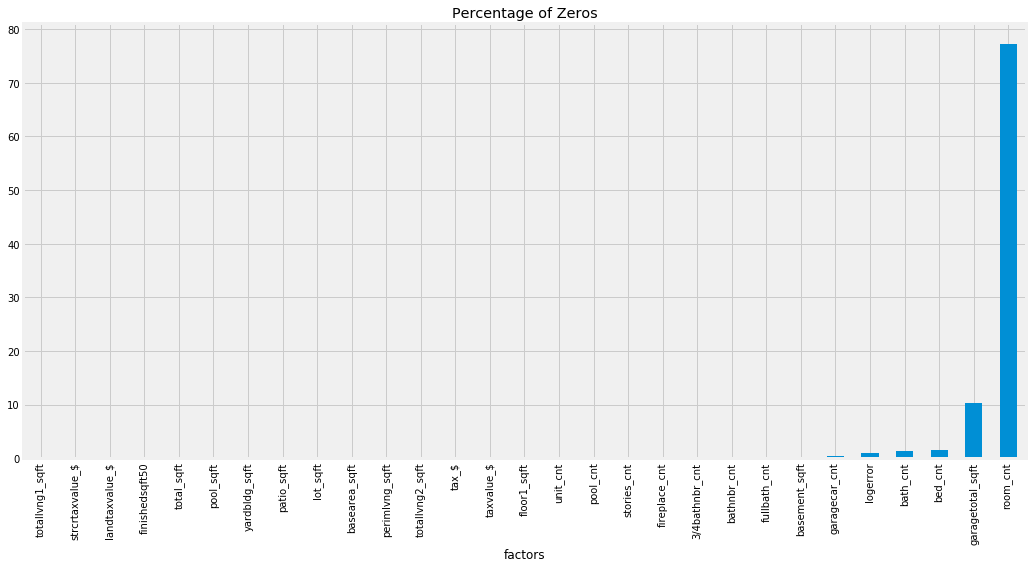

In [18]:
stats.sort_values('perc_zero', inplace=True) # sort dataset by percentage of zeroes a factor has
stats.perc_zero.index = stats.factors # make percentage of zeroes a factor
ax = plt.axes() # set up plot
ax.set_xlabel('Columns',fontdict={'fontsize':'large'}) # set up labels
stats.perc_zero.plot(kind='bar', figsize=(16,8),title="Percentage of Zeros") # plot barchart

# Null Data
To assess the quality of the data, we inspect the percentage of observations that are null for a given factor.  This would indicate the utility of the factor, whether values should be imputed, or whether to ignore the factor completely.  

We find that the most comprehensive variables are the most intuitive; the number of bedrooms and bathrooms, the size of the entire property and structure, and the tax value.

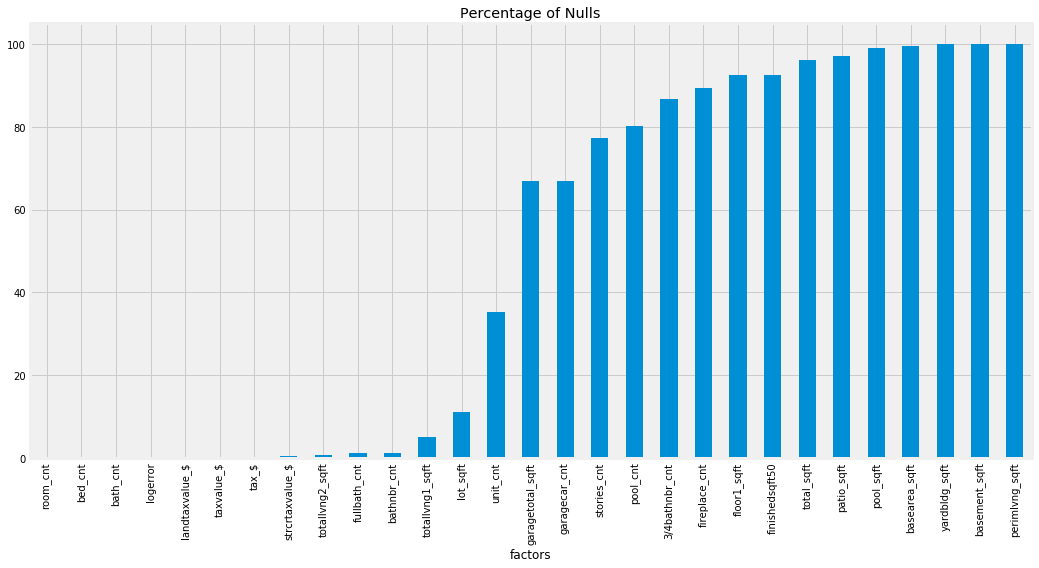

In [19]:
# sort dataset by percentage of nulls a factor has
stats.sort_values('perc_null', inplace=True)  

# make percentage of nulls a factor
stats.perc_null.index = stats.factors 

# set up plot
ax = plt.axes() 

# set up labels
ax.set_xlabel('Columns',fontdict={'fontsize':'large'}) 

# plot barchart
stats.perc_null.plot(kind='bar', figsize=(16,8),title="Percentage of Nulls") 

# Factor Exploration
To give us better insight into each of the variables, we explore:

### Measures of Central Tendency
The distribution of their values gives us a birds-eye view of the data and an understanding of what the normal values are. The boxplot focuses more on segmenting the distribution and better highlights what variables are outliers and might be anomolous and require greater exploration

##### Stories/Units/Tax
We see that there are a structures that are significantly larger than the all other data.  Presumably, this is an apartment complex of some sort.  What's interesting is that there seems to be very few observations, unusual for such a large city.  They don't seem to affect the log error independently, but perhaps it may be prudent to explore these observations more.

### R^2 with Target Variable
This indicates which factor has a high correlation with the target variable, namely the log error.  We can also determine if there is an observation that has a high influence on the regression, an indication that that outlier may be more significant. 

##### Basement/Perimeter/Shed
These variables seem to have the highest influence on the log error, albeit it slight.  This may have to do with the limited number of observations these variables have.

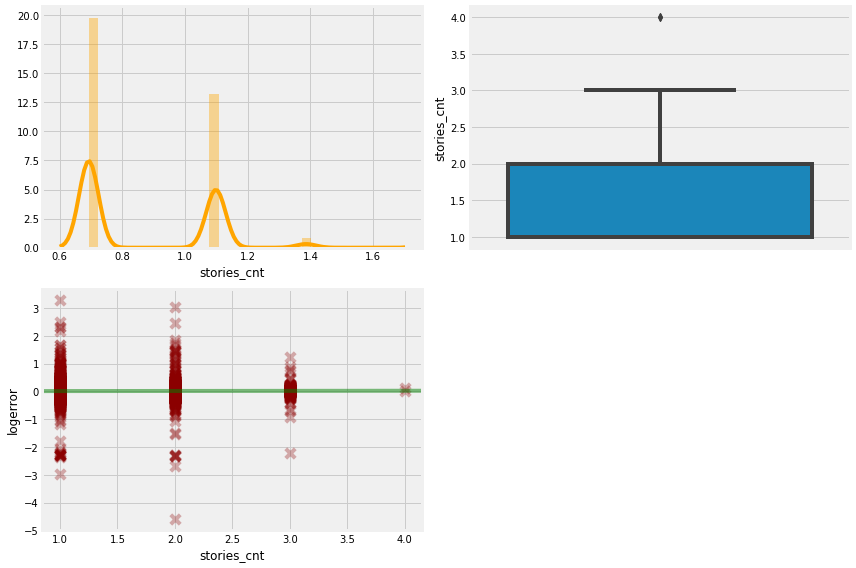

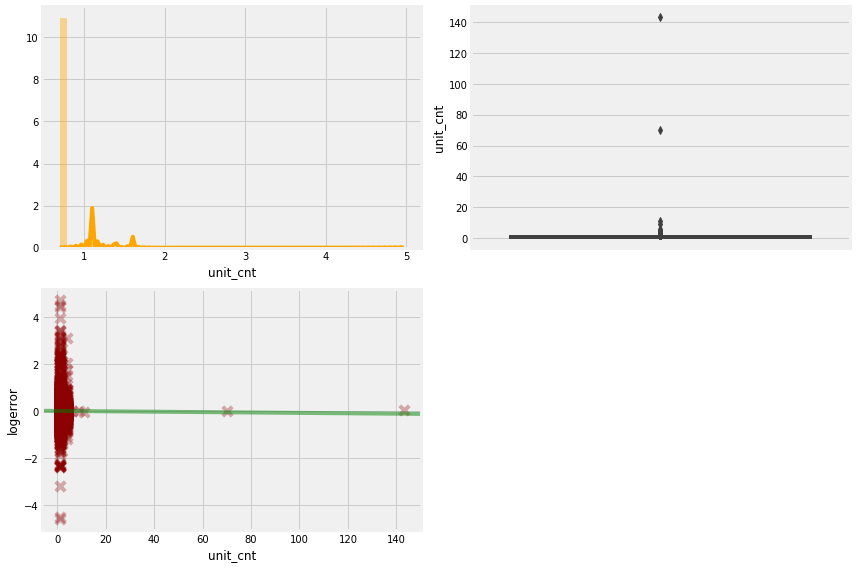

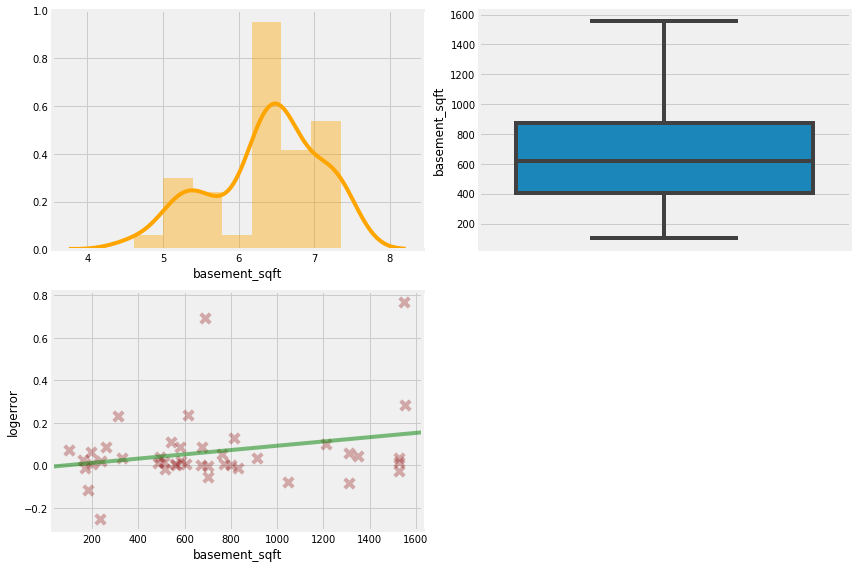

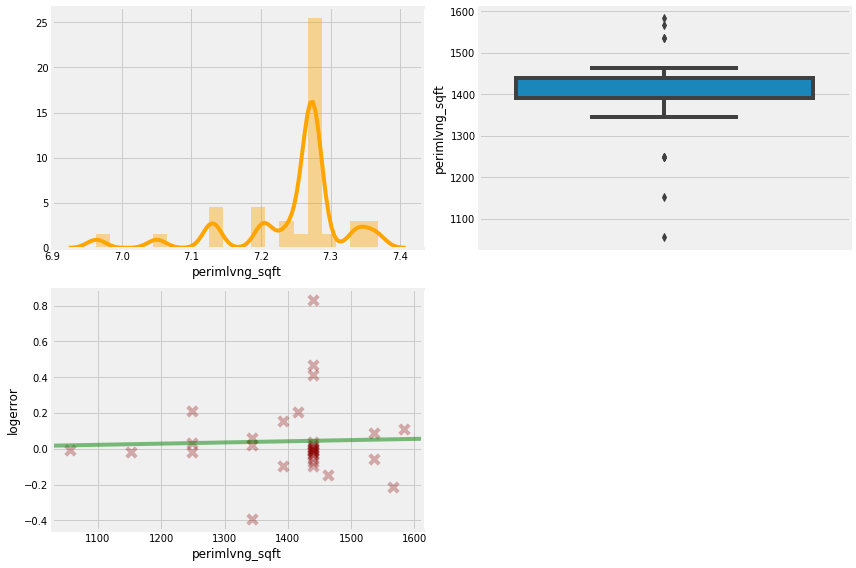

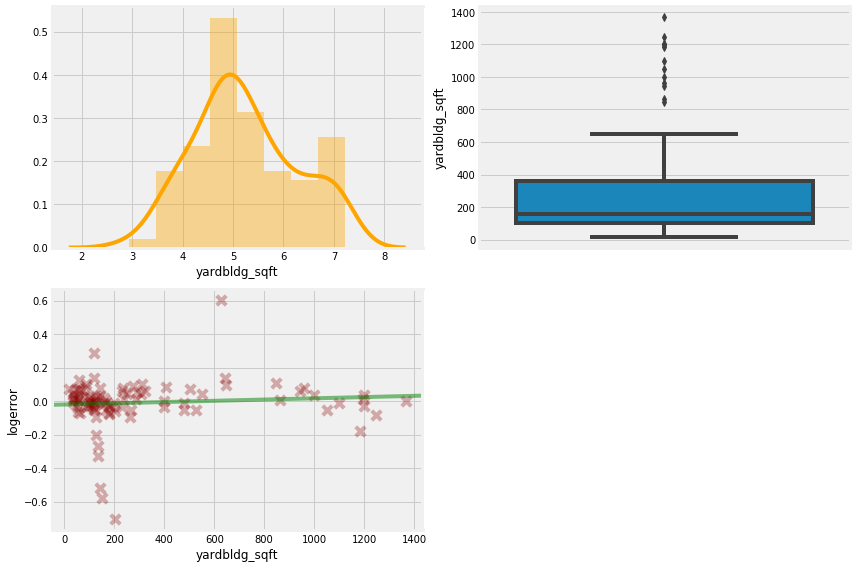

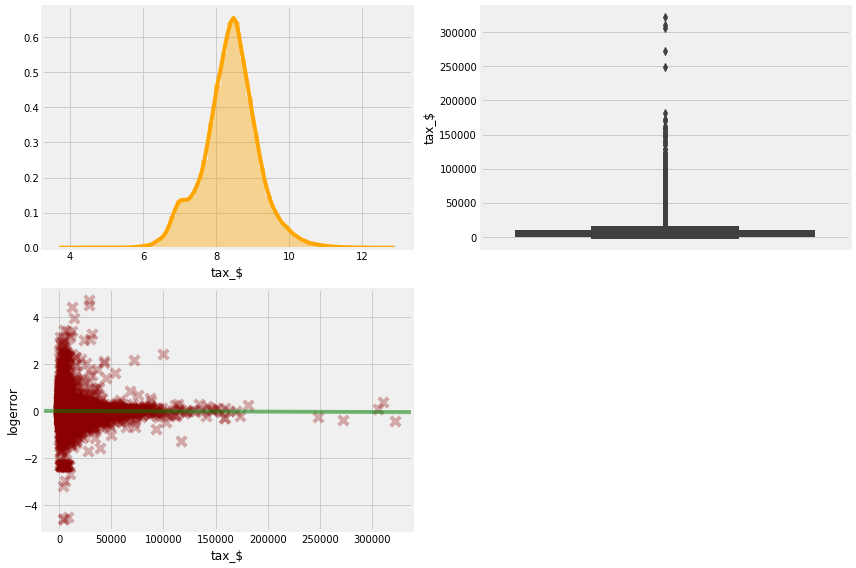

In [20]:
# This graph is limited to features that we found have significant inisghts
graph_data = num_data[['logerror','basement_sqft', 'perimlvng_sqft', 'tax_$', 'stories_cnt', 'unit_cnt', 'yardbldg_sqft']]

#Looping through these features
for i, col in enumerate(graph_data.columns[1:]):
    #Setting up the plots
    fig = plt.figure(i,figsize=(12,8))
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223)
    
    # Boxplot of the data along with a Log transformation to normalize skewed data
    sns.boxplot(graph_data[col].dropna(), orient='v', ax=ax2)
    plt.xlabel(col)
    
    # Corellation between log error and feature, along with the data points distributed around the R^2
    g = sns.regplot(x=col, y='logerror', data=graph_data, ax=ax3 ,ci = False,
        scatter_kws={"color":"darkred","alpha":0.3,"s":90},
        line_kws={"color":"g","alpha":0.5,"lw":4},marker="x")
    
    # Mapping the distribution of the feature
    sns.distplot(np.log1p(graph_data[col].dropna()), color = "orange", kde = True, ax=ax1)

    plt.tight_layout()
    plt.show()

## Correlation

Generating a correlation matrix will allow us to identify values that are highly connected - either in a positive or negative relationship. 

Many of these correlations are intuitive; for example, the more 3/4 bathrooms a property has, the more full bathrooms it is likely to have.  Simialrly, the larger the total living space area is, the bigger the entire lot is likely to be.

While it is useful to eliminate duplicitous variables since they offer no additional value to the model, it is important to recognize that the right one must be chosen, since one might have a better impact on the accuracy than the other.

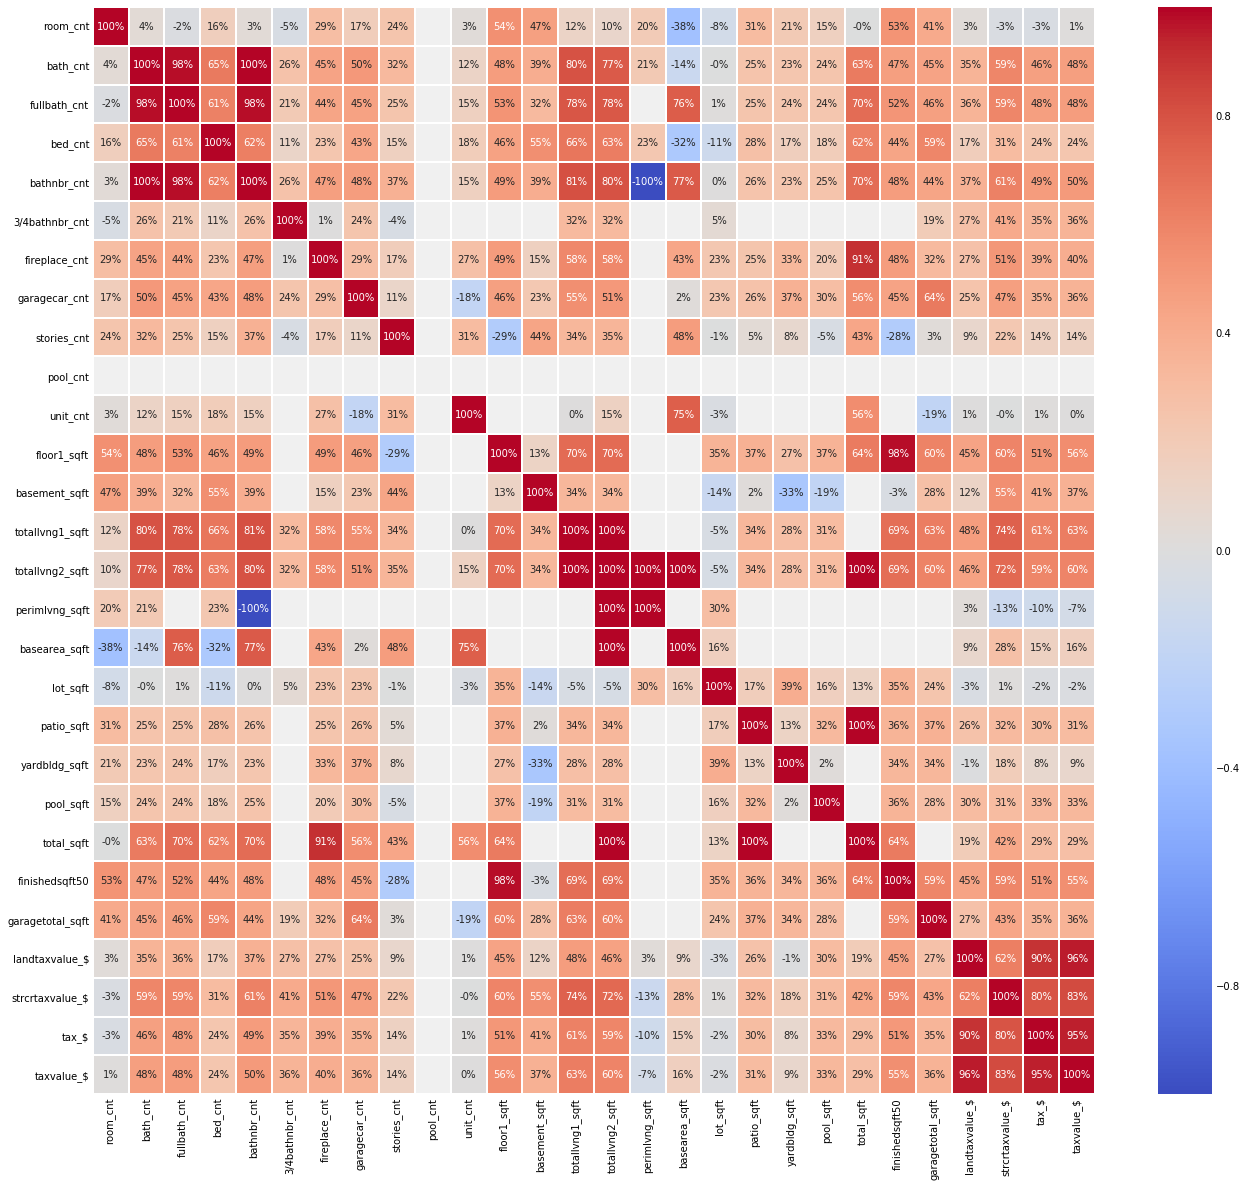

In [21]:
# Compute the correlation matrix
corr = num_data.iloc[:, 1:].corr()

# Draw the heatmap 
f, ax = plt.subplots(figsize=(20,20))
ax = sns.heatmap(corr, cmap="coolwarm", fmt='.0%',
    linecolor='white',linewidths=1, annot=True)

## Identifying the top correlated variables
Since there are a significant amount of variables, we want to identify if there are any relationships that are particularly strong - either positively or negatively.

The results are intuitive, again, where financial metrics seem to align, as do area metrics.  There are a few that have a high percentage of missing values, which diminishes the value of the correlation, but for the most part there are no anomalies, and it would not be surprising if feature selection and dimension reduction techniques would regard some of these as unnecessary.

In [22]:
corr_df = pd.melt(corr.reset_index(), id_vars=['index'])
corr_df['value'] = abs(corr_df['value']) 
corr_df = corr_df.loc[:][corr_df >= .80]
corr_df = corr_df.dropna()
corr_df = corr_df[corr_df['index'] != corr_df['variable']]

In [23]:
# We set up a filter to visulize the highest correlated variables
filter = corr_df['variable'].select(lambda x: (
                       (corr_df['index'] > corr_df['variable']) &
                       (corr_df['index'] == corr_df['variable'].loc[x]) & 
                       (corr_df['variable'] == corr_df['index'].loc[x])
                   ).any())

# remove duplicate pairs
corr_df.drop(filter.index, inplace=True)
print(corr_df.sort_values('value'))

               index         variable     value
126  totallvng2_sqft  bathnbr_cnt      0.801208
125  totallvng1_sqft  bathnbr_cnt      0.805475
727  taxvalue_$       strcrtaxvalue_$  0.826052
698  tax_$            landtaxvalue_$   0.902713
189  total_sqft       fireplace_cnt    0.909932
755  taxvalue_$       tax_$            0.949376
699  taxvalue_$       landtaxvalue_$   0.955336
627  floor1_sqft      finishedsqft50   0.980182
30   fullbath_cnt     bath_cnt         0.984130
114  fullbath_cnt     bathnbr_cnt      0.984130
462  totallvng2_sqft  basearea_sqft    1.000000
525  total_sqft       patio_sqft       1.000000
602  totallvng2_sqft  total_sqft       1.000000
127  perimlvng_sqft   bathnbr_cnt      1.000000
32   bathnbr_cnt      bath_cnt         1.000000
378  totallvng2_sqft  totallvng1_sqft  1.000000
434  totallvng2_sqft  perimlvng_sqft   1.000000


In [27]:
cnt_data = num_data[['logerror', 'room_cnt', 'bath_cnt', 'fullbath_cnt', 'bed_cnt', 'bathnbr_cnt','3/4bathnbr_cnt', 'fireplace_cnt', 'garagecar_cnt', 'stories_cnt', 'pool_cnt', 'unit_cnt']]
area_data = num_data[['logerror', 'floor1_sqft', 'basement_sqft', 'totallvng1_sqft', 'totallvng2_sqft', 'perimlvng_sqft', 'basearea_sqft', 'lot_sqft', 'patio_sqft', 'yardbldg_sqft', 'pool_sqft', 'total_sqft', 'finishedsqft50', 'garagetotal_sqft']]
tax_data = num_data[['logerror', 'landtaxvalue_$', 'strcrtaxvalue_$', 'tax_$', 'taxvalue_$']]

## Build Year

We want to see how the build year of the properties is distributed.

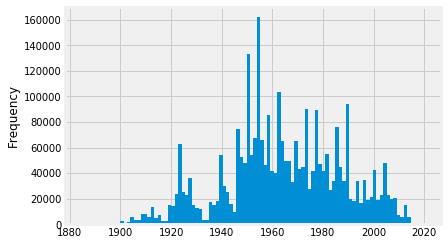

In [24]:
build_year = df.yearbuilt.dropna()
build_year.plot(kind="hist", range=[1885, 2020], bins = 100)

## Exploring data dictionary

To determine which variables are duplicitous, we explore the data dictionary deeper to see what each variable means, and choose the variable that has a more robust set of data; both in terms of less null/zero values, and which would have a broader impact on the predictive power of the model

In [28]:
workbook = pd.ExcelFile('zillow_data_dictionary.xlsx')

In [29]:
workbook.sheet_names

['Data Dictionary',
 'HeatingOrSystemTypeID',
 'PropertyLandUseTypeID',
 'StoryTypeID',
 'AirConditioningTypeID',
 'ArchitecturalStyleTypeID',
 'TypeConstructionTypeID',
 'BuildingClassTypeID']

In [30]:
data_dictionary = pd.read_excel('zillow_data_dictionary.xlsx')

In [31]:
sheet_features = {val:val.lower() for val in workbook.sheet_names[1:]}
sheet_features

{'AirConditioningTypeID': 'airconditioningtypeid',
 'ArchitecturalStyleTypeID': 'architecturalstyletypeid',
 'BuildingClassTypeID': 'buildingclasstypeid',
 'HeatingOrSystemTypeID': 'heatingorsystemtypeid',
 'PropertyLandUseTypeID': 'propertylandusetypeid',
 'StoryTypeID': 'storytypeid',
 'TypeConstructionTypeID': 'typeconstructiontypeid'}

## Architectual Features

Different elements of the property obviously impact the value, and may impact the current predictions.  Are older houses which gas or steam heating harder to predict?  Is the plot of land empty or does it have an apartment complex on it where multiple units can complicate the data?

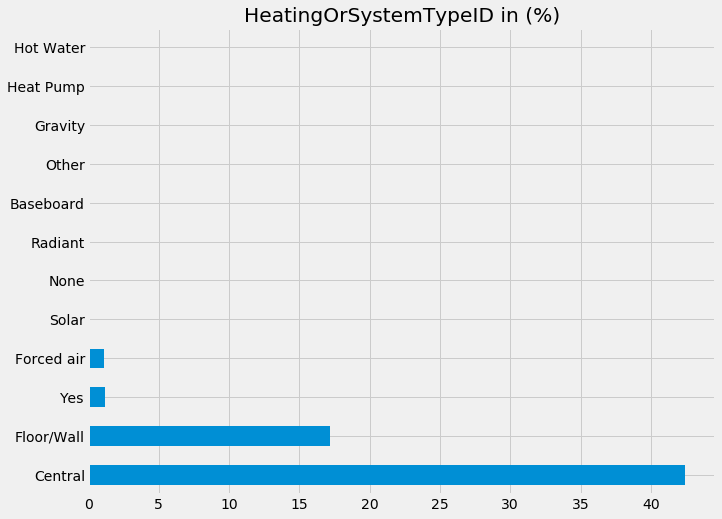

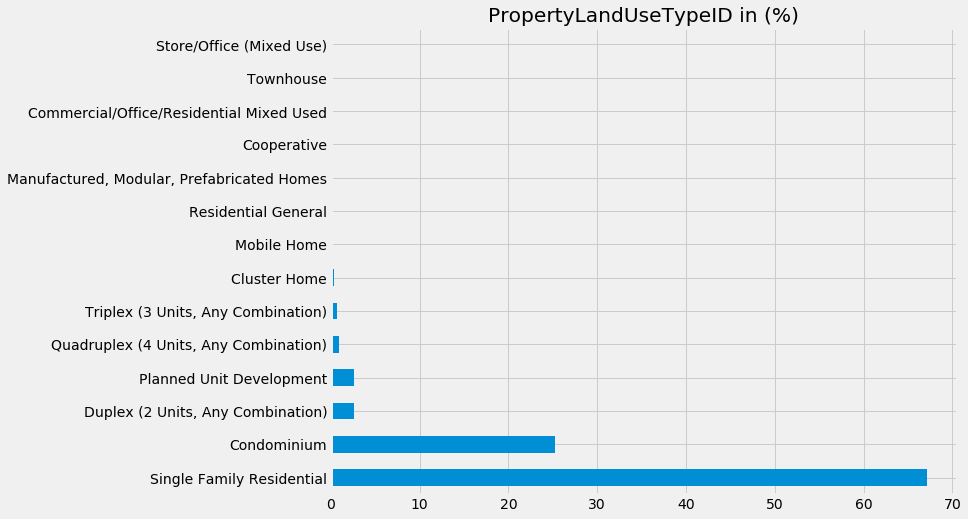

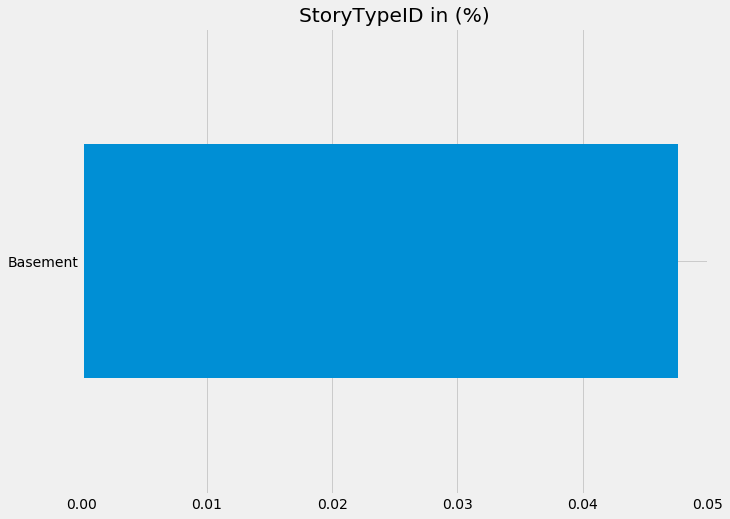

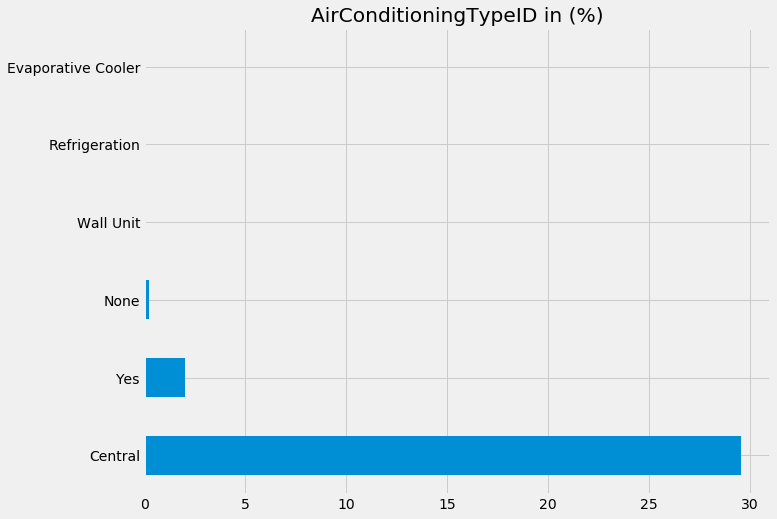

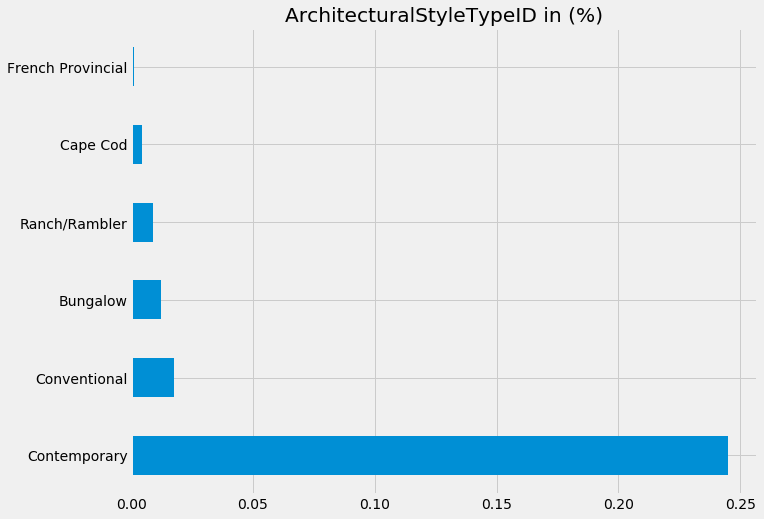

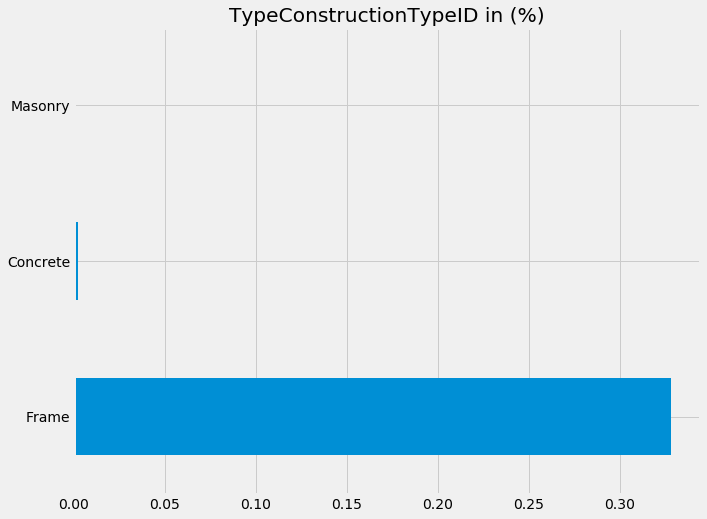

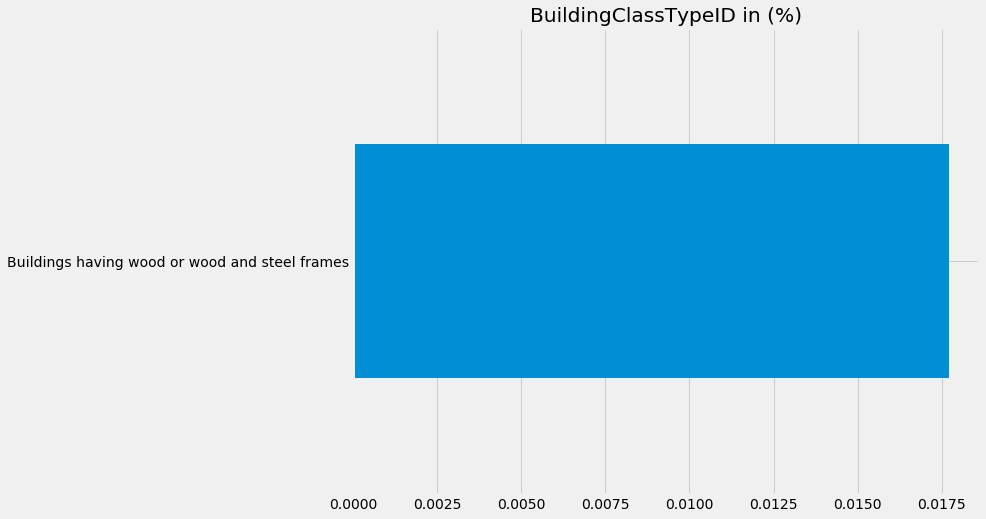

In [32]:
def look_up(num, sheet):
    return sheet[sheet[sheet.columns[0]] == num][sheet.columns[1]].values[0]
    
    
for sheet_name, sheet_feature in sheet_features.items():
    val_counts = joined_data[sheet_feature].value_counts()/len(joined_data) * 100
    sheet_data = pd.read_excel('zillow_data_dictionary.xlsx',sheetname=sheet_name)
    val_counts.index = [look_up(int(val), sheet_data) for val in val_counts.index]
    val_counts.plot(kind='barh',title=sheet_name + ' in (%)', figsize=(10,8))
    plt.show()

## Geographical distribution

Different neighborhoods impact the logerror - if you are in a zip code where there used to be a lot of older houses, yet people are tearing them down and building more expensive houses, that can impact the prediction.  Where are these properties?

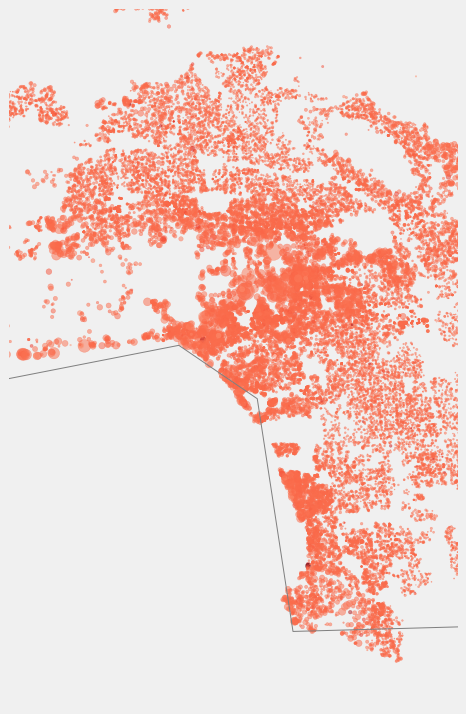

In [33]:
# We used the following kernel as a guideline to visualize the geographical representation 
# https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.13-Geographic-Data-With-Basemap.ipynb

# Drawing the map background
scale=1000000
lon,lat = joined_data.longitude.values/scale, joined_data.latitude.values/scale

fig = plt.figure(figsize=(12, 12))
m = Basemap(projection='lcc', resolution='l', lat_0=37, lon_0=-123,
            llcrnrlon=-118.761333, llcrnrlat=33.679916,
            urcrnrlon=-118.175567, urcrnrlat=34.358850,
            width=1.4E6, height=1.3E6)

m.drawcoastlines(color='gray')
m.drawcountries(color='gray')

m.drawstates(color='gray')

# Scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True,
          c=joined_data.logerror.values*1000,s=joined_data.taxamount.values/1000,
          cmap='Reds', alpha=0.5)

# lower left: 33.679916, -118.761333
# Upper right: 34.358850, -118.175567

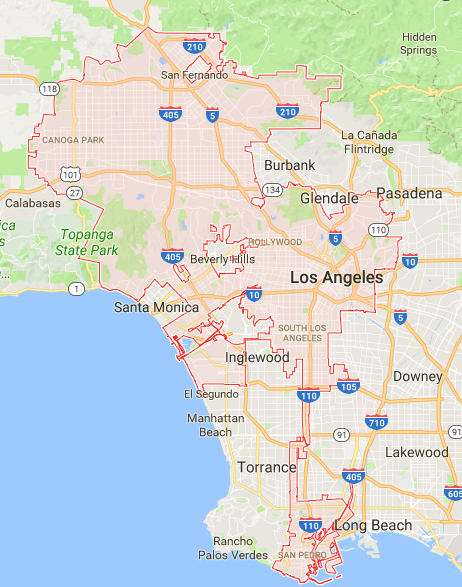

In [35]:
from IPython.display import Image
Image("greater_los_angeles.PNG")